<a href="https://colab.research.google.com/github/subh-775/Academicia/blob/main/Dummy_GPT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a GPT model from scratch to generate text

![GPT Architecture](/content/gpt.png)


In [1]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers(Transformer blocks)
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

# Part 1: Dummy GPT model class

<div class="alert alert-info">

Step 1: Use a placeholder for TransformerBlock

Step 2: Use a placeholder for LayerNorm

</div>

In [2]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])  # a 50257,768 dim vector space
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"]) # positional embedding
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # final embeddings
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

## Step 1: Tokenization

In [3]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00


In [4]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


## Step 2: Create an instance of Dummy GPT model

In [5]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


The output tensor has two rows corresponding to the two text samples. Each text sample consists of 4 tokens; each token is a 50,257-dimensional vector, which matches the size of the tokenizer's vocabulary.

The embedding has 50,257 dimensions because each of these dimensions refers to a unique token in the vocabulary. At the end of this chapter, when we implement the postprocessing code, we will convert these 50,257-dimensional vectors back into token IDs, which we can then decode into words.

# Part 2: Layer Normalization

In [6]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)


# output is as:
#batch 1's: [y1,y2,y3,y4,y5,y6]
#batch 2's: [y1,y2,y3,y4,y5,y6]

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


The neural network layer we have coded consists of a Linear layer followed by a non-linear activation function, ReLU (short for Rectified Linear Unit), which is a standard activation function in neural networks.

If you are unfamiliar with ReLU, it simply thresholds negative inputs to 0, ensuring that a layer outputs only positive values, which explains why the resulting layer output does not contain any negative values.

(Note that we will use another, more sophisticated activation function in GPT, which we will introduce in the next section).

In [7]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


The first & second row in the mean tensor above contains the mean values for the first and second input rows, respectively.

Using keepdim=True in operations like mean or variance calculation ensures that the output tensor retains the same number of dimensions as the input tensor, even though the operation reduces the tensor along the dimension specified via dim.

For instance, without keepdim=True, the returned mean tensor would be a 2-dimensional vector [0.1324, 0.2170] instead of a 2×1-dimensional matrix [[0.1324], [0.2170]].

For a 2D tensor (like a matrix), using dim=-1 for operations such as mean or variance calculation is the same as using dim=1.

This is because -1 refers to the tensor's last dimension, which corresponds to the columns in a 2D tensor.

Later, when adding layer normalization to the GPT model, which produces 3D tensors with shape [batch_size, num_tokens, embedding_size], we can still use dim=-1 for normalization across the last dimension, avoiding a change from dim=1 to dim=2.

Next, let us apply layer normalization to the layer outputs we obtained earlier. The operation consists of subtracting the mean and dividing by the square root of the variance (also known as standard deviation):

In [8]:
out_norm = (out - mean) / torch.sqrt(var)   #output normalization
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


Note that the value 2.9802e-08 in the output tensor is the scientific notation for 2.9802 × 10-8, which is 0.0000000298 in decimal form. This value is very close to 0, but it is not exactly 0 due to small numerical errors that can accumulate because of the finite precision with which computers represent numbers.

To improve readability, we can also turn off the scientific notation when printing tensor values by setting sci_mode to False:

In [9]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-info">
let's now encapsulate this process in a PyTorch module that we can use in the GPT later:
<div>

In [10]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

This specific implementation of layer Normalization operates on the last dimension of the input tensor x, which represents the embedding dimension (emb_dim).

The variable eps is a small constant (epsilon) added to the variance to prevent division by zero during normalization.

The scale and shift are two trainable parameters (of the same dimension as the input) that the LLM automatically adjusts during training if it is determined that doing so would improve the model's performance on its training task.

This allows the model to learn appropriate scaling and shifting that best suit the data it is processing.

In our variance calculation method, we have opted for an implementation detail by setting unbiased=False.

For those curious about what this means, in the variance calculation, we divide by the number of inputs n in the variance formula.

This approach does not apply Bessel's correction, which typically uses n-1 instead of n in the denominator to adjust for bias in sample variance estimation.

This decision results in a so-called biased estimate of the variance.

For large-scale language models (LLMs), where the embedding dimension n is significantly large, the difference between using n and n-1 is practically negligible.

We chose this approach to ensure compatibility with the GPT-2 model's normalization layers and because it reflects TensorFlow's default behavior, which was used to implement the original GPT2 model.

Let's now try the LayerNorm module in practice and apply it to the batch input:

In [11]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)
print("Batch Example:\n", batch_example)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)
Batch Example:
 tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])


As we can see based on the results, the layer normalization code works as expected and normalizes the values of each of the two inputs such that they have a mean of 0 and a variance of 1:

# Part 3: Feedforward neural network with GELU activation

Let's implement the GELU activation function approximation used by GPT-2:

In [12]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))

To get an idea of what this GELU function looks like and how it compares to the ReLU function, let's plot these functions side by side:

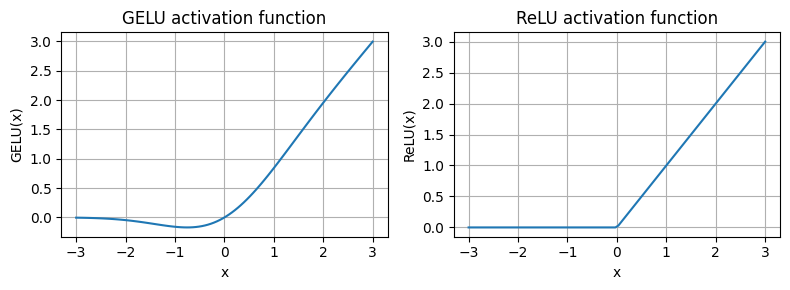

In [13]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()

As we can see in the resulting plot, ReLU is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero.

GELU is a smooth, nonlinear function that approximates ReLU but with a non-zero gradient for negative values.

The smoothness of GELU, as shown in the above figure, can lead to better optimization properties during training, as it allows for more nuanced adjustments to the model's parameters.

In contrast, ReLU has a sharp corner at zero, which can sometimes make optimization harder, especially in networks that are very deep or have complex architectures.

Moreover, unlike RELU, which outputs zero for any negative input, GELU allows for a small, non-zero output for negative values.

*Dead Neuron problem* :  This characteristic means that during the training process, neurons that receive negative input can still contribute to the learning process, albeit to a lesser extent than positive inputs.

Next, let's use the GELU function to implement the small neural network module, FeedForward, that we will be using in the LLM's transformer block later:

In [14]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)

In [15]:
print(GPT_CONFIG_124M["emb_dim"])

768


After the linear layer, the inputs are projected into a 4-times larger space via the first linear layer

In [16]:
print("No. of neurons in the first layer(where inputs are projected):\n", 4*GPT_CONFIG_124M["emb_dim"])

No. of neurons in the first layer(where inputs are projected):
 3072


And in the second layer they are compressed back to their original dimension:

input_dim=output_dim

<div class="alert alert-success">
here's how the feedforward neural network module looks like:
</div>

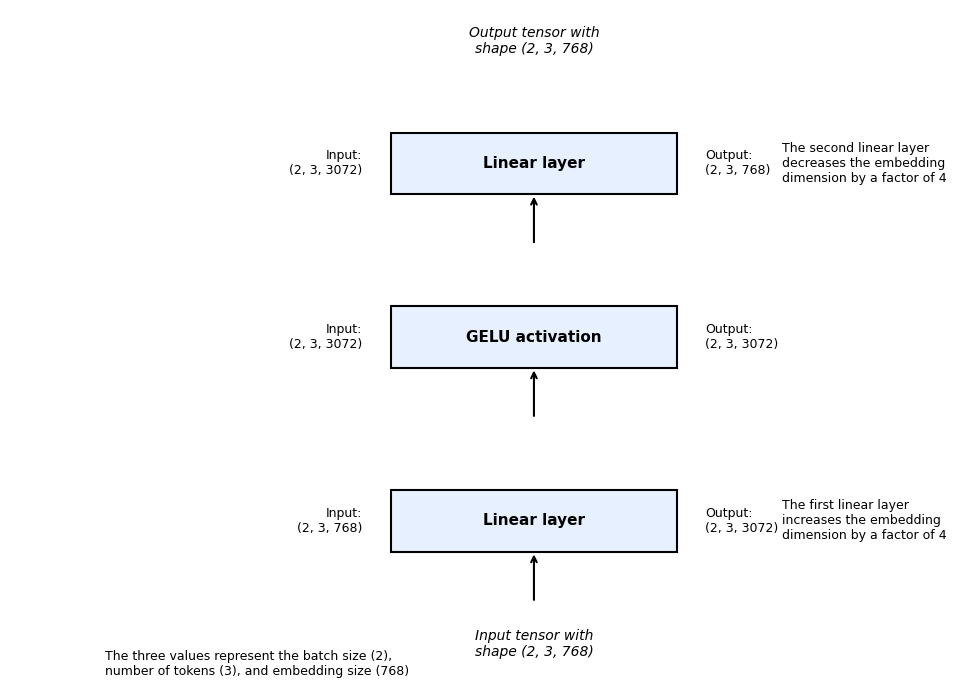

In [17]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(10, 7))

# Define the layers and positions
layers = [
    {"y": 5.0, "label": "Linear layer", "in_shape": "(2, 3, 3072)", "out_shape": "(2, 3, 768)",
     "note": "The second linear layer\ndecreases the embedding\ndimension by a factor of 4"},
    {"y": 3.3, "label": "GELU activation", "in_shape": "(2, 3, 3072)", "out_shape": "(2, 3, 3072)",
     "note": ""},
    {"y": 1.5, "label": "Linear layer", "in_shape": "(2, 3, 768)", "out_shape": "(2, 3, 3072)",
     "note": "The first linear layer\nincreases the embedding\ndimension by a factor of 4"},
]

# Draw each layer box and annotations
for layer in layers:
    # Draw rectangle
    ax.add_patch(plt.Rectangle((4, layer["y"] - 0.3), 3, 0.6, color="#e6f0ff", ec="black", lw=1.5))
    ax.text(5.5, layer["y"], layer["label"], ha="center", va="center", fontsize=11, weight="bold")

    # Input/output shapes
    ax.text(3.7, layer["y"], f"Input:\n{layer['in_shape']}", ha="right", va="center", fontsize=9)
    ax.text(7.3, layer["y"], f"Output:\n{layer['out_shape']}", ha="left", va="center", fontsize=9)

    # Additional notes
    if layer["note"]:
        ax.text(8.1, layer["y"], layer["note"], ha="left", va="center", fontsize=9)

# Arrows between layers
arrow_ys = [0.7, 2.5, 4.2]
for y in arrow_ys:
    ax.annotate('', xy=(5.5, y + 0.5), xytext=(5.5, y), arrowprops=dict(arrowstyle="->", lw=1.5))

# Input and Output shapes
ax.text(5.5, 0.3, "Input tensor with\nshape (2, 3, 768)", ha="center", va="center", fontsize=10, style="italic")
ax.text(5.5, 6.2, "Output tensor with\nshape (2, 3, 768)", ha="center", va="center", fontsize=10, style="italic")

# Bottom explanatory note
ax.text(1, 0.1,
        "The three values represent the batch size (2),\nnumber of tokens (3), and embedding size (768)",
        fontsize=9, va="center", ha="left")

# Final figure formatting
ax.set_xlim(0, 10)
ax.set_ylim(0, 6.5)
ax.axis("off")
plt.tight_layout()
plt.show()


As we can see in the preceding code, the FeedForward module is a small neural network consisting of two Linear layers and a GELU activation function.

In the 124 million parameter GPT model, it receives the input batches with tokens that have an embedding size of 768 each via the GPT_CONFIG_124M dictionary where GPT_CONFIG_124M["emb_dim"] = 768.

Let's use the GELU function to implement the small neural network module, FeedForward, that we will be using in the LLM's transformer block later:

In [18]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


The FeedForward module we implemented in this section plays a crucial role in enhancing the model's ability to learn from and generalize the data.

Although the input and output dimensions of this module are the same, it internally expands the embedding dimension into a higher-dimensional space through the first linear layer.

This expansion is followed by a non-linear GELU activation, and then a contraction back to the original dimension with the second linear transformation.

Such a design allows for the exploration of a richer representation space.

Moreover, the uniformity in input and output dimensions simplifies the architecture by enabling the stacking of multiple layers, as we will do later, without the need to adjust dimensions between them, thus making the model more scalable.(particulary in a transformer block)

# Part 4: Shortcut Connections

Let us understand about Shortcut Connections

In [19]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x

The code implements a deep neural network with 5 layers, each consisting of a Linear layer and a GELU activation function.

In the forward pass, we iteratively pass the input through the layers and optionally add the shortcut connections if the self.use_shortcut attribute is set to True.

Let's use this code to first initialize a neural network without shortcut connections. Here, each layer will be initialized such that it accepts an example with 3 input values and returns 3 output values. The last layer returns a single output value:

In [20]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=False
)

Next, we implement a function that computes the gradients in the the model's backward pass:

In [21]:

def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In the preceding code, we specify a loss function that computes how close the model output and a user-specified target (here, for simplicity, the value 0) are.

Then, when calling loss.backward(), PyTorch computes the loss gradient for each layer in the model.

We can iterate through the weight parameters via model.named_parameters().

Suppose we have a 3×3 weight parameter matrix for a given layer.

In that case, this layer will have 3×3 gradient values, and we print the mean absolute gradient of these 3×3 gradient values to obtain a single gradient value per layer to compare the gradients between layers more easily.

In short, the .backward() method is a convenient method in PyTorch that computes loss gradients, which are required during model training, without implementing the math for the gradient calculation ourselves, thereby making working with deep neural networks much more accessible.

Let's now use the print_gradients function and apply it to the model without skip connections:

In [22]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031



As we can see based on the output of the print_gradients function, the gradients become smaller as we progress from the last layer (layers.4) to the first layer (layers.0), which is a phenomenon called the vanishing gradient problem.

Let's now instantiate a model with skip connections and see how it compares:

In [23]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


As we can see, based on the output, the last layer (layers.4) still has a larger gradient than the other layers.
However, the gradient value stabilizes as we progress towards the first layer (layers.0) and doesn't shrink to a vanishingly small value.

In conclusion, shortcut connections are important for overcoming the limitations posed by the vanishing gradient problem in deep neural networks.

Shortcut connections are a core building block of very large models such as LLMs, and they will help facilitate more effective training by ensuring consistent gradient flow across layers when we train the GPT model

# part 5: Coding attention and linear layer in a Transformer block